<a href="https://colab.research.google.com/github/JoDeMiro/DeepLearningIntroduction/blob/main/00_Math_behind_Neural_Network_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Műveletek függvényekkel

Különös tekintettel a láncszabályra és a deriváltakra nézve.

### Érdekes kitekintések a Notebook használatához

[Euler féle szám](#https://hu.wikipedia.org/wiki/Euler-f%C3%A9le_sz%C3%A1m)

[Határozatlan integrál](#https://hu.wikipedia.org/wiki/Hat%C3%A1rozatlan_integr%C3%A1l)

[Hiberbolikus függvények](#https://hu.wikipedia.org/wiki/Hiperbolikus_f%C3%BCggv%C3%A9nyek)

[Szigmoid függvények](#https://hu.wikipedia.org/wiki/Szigmoid_f%C3%BCggv%C3%A9nyek)

[Diffenciál számítás](#https://hu.wikipedia.org/wiki/Differenci%C3%A1lsz%C3%A1m%C3%ADt%C3%A1s)

### További olvasmányok

[Calculate the derive of sigmoid function in neural net](#https://becominghuman.ai/what-is-derivative-of-sigmoid-function-56525895f0eb)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def square(x):
  return x**2

def abs(x):
  return np.abs(x)

def linear(x):
  return 2 + 1.3*x

def sigmoid(x):
  return 1 / (1 + 2.7182818**-x)

def tanh(x):
  return (2.7182818**x - 2.7182818**-x) / (2.7182818**x + 2.7182818**-x)

In [3]:
x = np.arange(-5, 5, 0.1)

In [4]:
y_square = square(x)
y_abs = abs(x)
y_lin = linear(x)
y_sigmoid = sigmoid(x) * 10
y_tanh = tanh(x) * 10

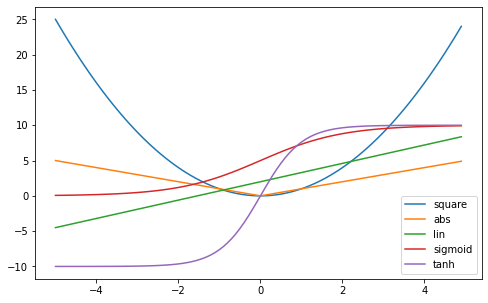

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(x, y_square, label = 'square')
plt.plot(x, y_abs, label = 'abs')
plt.plot(x, y_lin, label = 'lin')
plt.plot(x, y_sigmoid, label = 'sigmoid')
plt.plot(x, y_tanh, label = 'tanh')
plt.legend()
plt.show()

In [6]:
version_1 = square(linear(abs(x)))

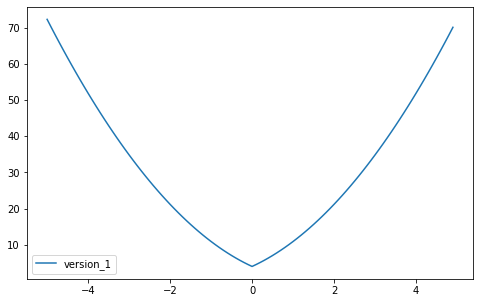

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(x, version_1, label = 'version_1')
plt.legend()
plt.show()

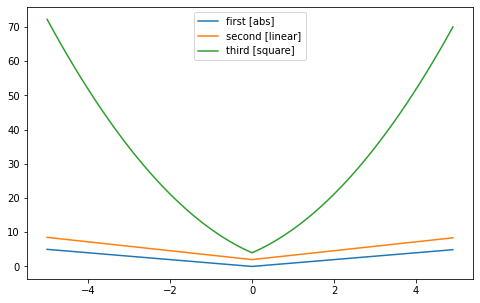

In [8]:
version_1 = square(linear(abs(x)))

first  = abs(x)
second = linear(first)
third  = square(second)

plt.figure(figsize=(8, 5))
plt.plot(x, first, label = 'first [abs]')
plt.plot(x, second, label = 'second [linear]')
plt.plot(x, third, label = 'third [square]')
plt.legend()
plt.show()

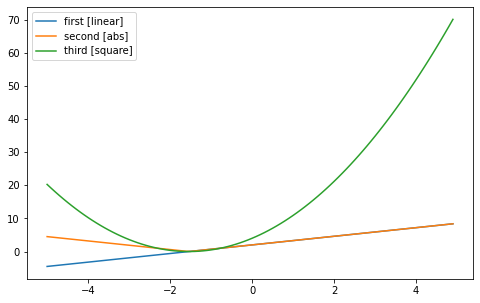

In [9]:
version_2 = square(abs(linear(x)))

first  = linear(x)
second = abs(first)
third  = square(second)

plt.figure(figsize=(8, 5))
plt.plot(x, first, label = 'first [linear]')
plt.plot(x, second, label = 'second [abs]')
plt.plot(x, third, label = 'third [square]')
plt.legend()
plt.show()

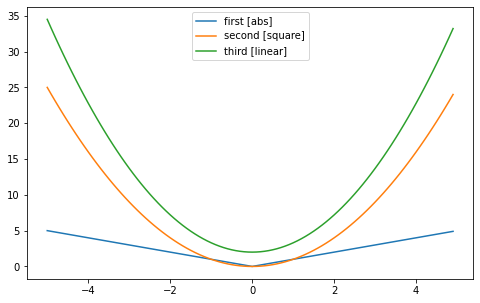

In [10]:
version_3 = linear(square(abs(x)))

first  = abs(x)
second = square(first)
third  = linear(second)

plt.figure(figsize=(8, 5))
plt.plot(x, first, label = 'first [abs]')
plt.plot(x, second, label = 'second [square]')
plt.plot(x, third, label = 'third [linear]')
plt.legend()
plt.show()

Hiberbolikus tangens:

$$ \text{th} \; x = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}, \;\;\; \frac{d}{dx} \text{th} \; x = 1 - \text{th}^2 x$$


Sigmoid:

$$ \sigma(x) = \frac{1}{1+e^{-x}}, \;\;\; \frac{d}{dx} =\sigma(x) (1-\sigma(x)) $$


In [11]:
def tanh_derive(x):
  return 1-(tanh(x)*tanh(x))

def sigmoid_derive(x):
  return sigmoid(x) * (1-sigmoid(x))

### Hiberbolikus tangens és deriváltja

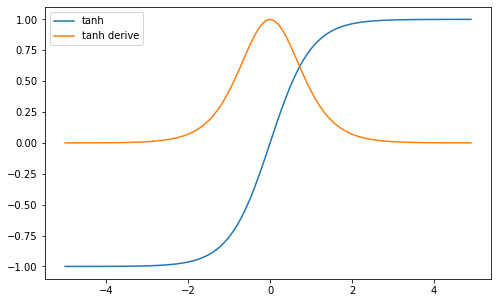

In [121]:

y_tanh = tanh(x)

y_tanh_derive = tanh_derive(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y_tanh, label = 'tanh')
plt.plot(x, y_tanh_derive, label = 'tanh derive')
plt.legend()
plt.show()

### Sigmoid függvény és deriváltja

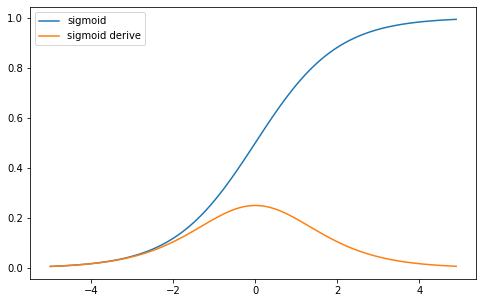

In [123]:
y_sigmoid_derive = sigmoid_derive(x)

y_sigmoid = sigmoid(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y_sigmoid, label = 'sigmoid')
plt.plot(x, y_sigmoid_derive, label = 'sigmoid derive')
plt.legend()
plt.show()

## Játék a Scikit Learn-nel

A Scikit Learn MLPRegressor osztályával. Fogjuk a súlyokat és kézzel állítjuk be.

In [82]:
import ipywidgets as widgets
from sklearn.neural_network import MLPRegressor
from ipywidgets import interact, interactive, fixed, interact_manual

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [100]:
# Létre kell hozni a MLPRegression objektumot -> figyeljünk oda, hogy milyen áktivációs függvényt kap

mlp = MLPRegressor(hidden_layer_sizes=(2, ), max_iter=1, n_iter_no_change=1, activation='logistic')

mlp.fit(x.reshape(-1, 1), y_sigmoid.ravel()) # -> ahhoz, hogy felül tudjuk írni a súlyokat előbb illeszteni kell

MLPRegressor(activation='logistic', hidden_layer_sizes=(2,), max_iter=1,
             n_iter_no_change=1)

In [101]:
mlp.coefs_

[array([[-0.42725875, -0.27027946]]), array([[-0.54431069],
        [-0.36648316]])]

In [102]:
mlp.intercepts_

[array([ 0.54717293, -0.54942754]), array([0.42211168])]

In [103]:
mlp.coefs_ = [np.array([[0.52163885, 0.83947953]]), np.array([[1.22757877], [0.85383002]])]
mlp.intercepts_ = [np.array([0.98333675, -1.14206471]), np.array([-0.35194626])]

In [127]:
def show_nn(_iw1, _ib1, _iw2 = 0, _ib2 = 0, _ow1 = 1, _ow2 = 0, _ob = 0):

  iw1 = _iw1  # input to neuron1 weight
  ib1 = _ib1  # input to neuron1 bias
  iw2 = _iw2  # input to neuron2 weight
  ib2 = _ib2  # input to neuron2 bias
  ow1 = _ow1  # neuron1 to output weight
  ow2 = _ow2  # neuron2 to output weight
  ob  = _ob   # output bias

  mlp.coefs_ = [np.array([[iw1, iw2]]), np.array([[ib1], [ib2]])]
  mlp.intercepts_ = [np.array([ow1, ow2]), np.array([ob])]

  predicted = mlp.predict(x.reshape(-1, 1))

  plt.figure(figsize=(8, 5))
  plt.plot(x, y_sigmoid, label = 'y_sigmoid')
  plt.plot(x, predicted, label = 'nn')
  plt.legend()
  plt.show()


In [128]:
_iw1 = widgets.FloatSlider(min=-3, max=3, step=0.01, value=2)
_ib1 = widgets.FloatSlider(min=-3, max=3, step=0.01, value=1)
_iw2 = widgets.FloatSlider(min=-3, max=3, step=0.01, value=0)
_ib2 = widgets.FloatSlider(min=-3, max=3, step=0.01, value=0)
_ow1 = widgets.FloatSlider(min=-3, max=3, step=0.01, value=1)
_ow2 = widgets.FloatSlider(min=-3, max=3, step=0.01, value=0)
_ob  = widgets.FloatSlider(min=-1, max=1, step=0.01, value=0)

In [129]:
interact(show_nn, _iw1=_iw1, _ib1=_ib1, _iw2=_iw2, _ib2=_ib2, _ow1=_ow1, _ow2=_ow2, _ob=_ob);

interactive(children=(FloatSlider(value=2.0, description='_iw1', max=3.0, min=-3.0, step=0.01), FloatSlider(va…

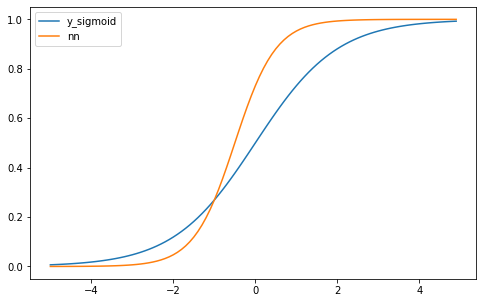

In [131]:
show_nn(_iw1 = 2, _ib1 = 1, _ow1 = 1)

## A derviálási szabályok

Ezekre azért van szükség mert amikor ki akarjuk majd számolni a gradienseket, akkor nem árt tudni ezeket. Persze ezeket már megteszik helyettünk a keretrendszerek mint amilyen a [Keras](#https://keras.io) vagy a [PyTorch](#https://pytorch.org).

Olvasmányok:

[A derivált - Wikipedia](#https://hu.wikipedia.org/wiki/Deriv%C3%A1lt)


## Elemi függvények deriváltjai

\begin{eqnarray}
\text{Konstans} \; c & , 0 \\
\text{Konstans szorzo} \; c * x & , c \\
\text{Konstans alap, var kitevo} \; a^x & , a^x \cdot ln|a| \\
\text{Hatvany} \; x ^ n & , x \cdot x^{n-1} \\
\text{Exp} \; e ^ x & , e ^ x \\
\text{Natural log} \; \text{ln}(x) & , \frac{1}{x} \\
\text{Log (a > 1} \; \text{log}_a x & , \frac{1}{x \text{ ln } a} = \frac{\text{log}_a e}{x} \\
\text{Sin} \; \text{sin}(x) & , \text{cos }x \\
\text{Cos} \; \text{cos}(x) & , \text{-sin }x \\
\text{Tangnt} \; \text{tg}(x) & , 1 + \text{tg}^2 \; x \\
\end{eqnarray}


